In [27]:
from random import Random
SEED = 5
random_gen = Random(x = SEED)

def generate_random_points(N = 1000):
  # random_gen = Random(x = SEED)
  list_x, list_y = [], []
  for _ in range(N):
    list_x.append(random_gen.uniform(a = 0, b = 1))
  for _ in range(N):
    list_y.append(random_gen.uniform(a = 0, b = 1))
  return list_x, list_y

data_x, data_y = generate_random_points()
print(data_x[:10])
print(data_y[:10])



[0.6229016948897019, 0.7417869892607294, 0.7951935655656966, 0.9424502837770503, 0.7398985747399307, 0.922324996665417, 0.029005228283614737, 0.46562265437810535, 0.9433567169983137, 0.6489745531369242]
[0.8713187027692235, 0.039767712548386625, 0.5888551653281111, 0.11745374212114823, 0.721120830858009, 0.6113236281477744, 0.6120458139259322, 0.22152129960368494, 0.9490212551961823, 0.11102495123278444]


In [28]:
def loss(x_i, y_i, x_p, y_p):
  n = len(x_i)
  return (1 / n) * sum(
      [sqrt((x_i - x_p)**2 + (y_i - y_p)**2)
        for x_i, y_i in zip(x_i, y_i)
      ]
  )

def find_minimum(x_i, y_i,x_p, y_p, delta, h,epochs = 3000):
  x_p_list = []
  y_p_list = []
  for _ in range(epochs):
    x_p_list.append(x_p)
    y_p_list.append(y_p)

   
    dloss_dx = (loss(x_i, y_i, x_p + H, y_p) - loss(x_i, y_i, x_p, y_p)) / h
    dloss_dy = (loss(x_i, y_i, x_p, y_p + H) - loss(x_i, y_i, x_p, y_p)) / h

  
    x_p -= delta * dloss_dx
    y_p -= delta * dloss_dy

  return x_p, y_p, x_p_list,y_p_list

In [29]:
from matplotlib.pyplot import figure 


0.482743153468442 0.4900446650496332


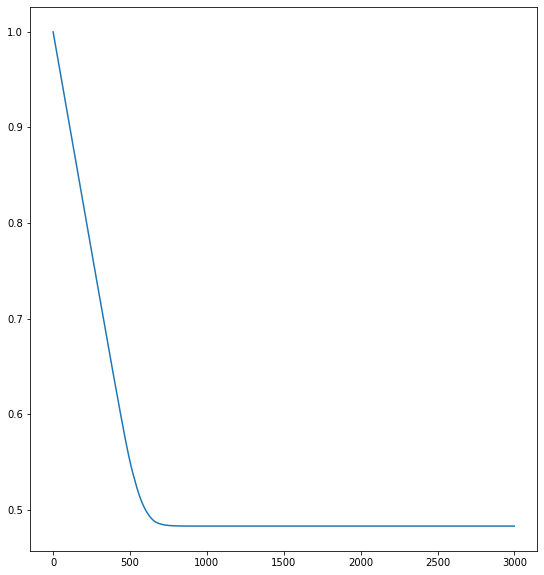

In [30]:
# first trial
DELTA = 0.01
H = 0.001
x_p, y_p, x_p_list, y_p_list = find_minimum(data_x, data_y,x_p =5, y_p=-5, delta = DELTA, h = H,epochs = 3000,)
fig_loss_curve = figure(figsize = (20, 10))
ax_loss_curve = fig_loss_curve.add_subplot(1, 2, 1)
ax_loss_curve.plot(x_p_list)
print(x_p, y_p)